In [1]:
%matplotlib inline


=============================================================================
Manifold learning on handwritten digits: Locally Linear Embedding, Isomap...
=============================================================================

An illustration of various embeddings on the digits dataset.

The RandomTreesEmbedding, from the :mod:`sklearn.ensemble` module, is not
technically a manifold embedding method, as it learn a high-dimensional
representation on which we apply a dimensionality reduction method.
However, it is often useful to cast a dataset into a representation in
which the classes are linearly-separable.

t-SNE will be initialized with the embedding that is generated by PCA in
this example, which is not the default setting. It ensures global stability
of the embedding, i.e., the embedding does not depend on random
initialization.



In [2]:
# Authors: Fabian Pedregosa <fabian.pedregosa@inria.fr>
#          Olivier Grisel <olivier.grisel@ensta.org>
#          Mathieu Blondel <mathieu@mblondel.org>
#          Gael Varoquaux
# License: BSD 3 clause (C) INRIA 2011

print(__doc__)
from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

digits = datasets.load_digits(n_class=6)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
n_neighbors = 30

Automatically created module for IPython interactive environment


In [3]:
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(digits.data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

Text(0.5,1,'A selection from the 64-dimensional digits dataset')

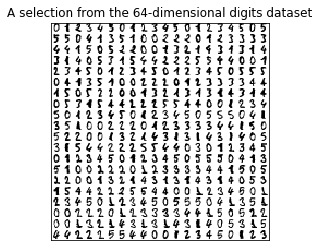

In [4]:
# Plot images of the digits
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset')

Computing random projection


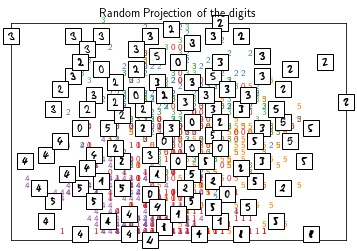

In [5]:
# Random 2D projection using a random unitary matrix
print("Computing random projection")
rp = random_projection.SparseRandomProjection(n_components=2, random_state=42)
X_projected = rp.fit_transform(X)
plot_embedding(X_projected, "Random Projection of the digits")

Computing PCA projection


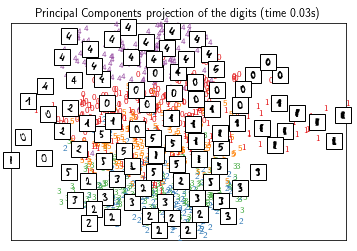

In [6]:
# Projection on to the first 2 principal components
print("Computing PCA projection")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plot_embedding(X_pca, "Principal Components projection of the digits (time %.2fs)" % (time() - t0))

Computing Linear Discriminant Analysis projection


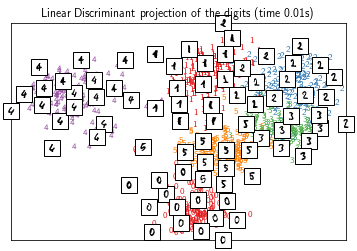

In [7]:
# Projection on to the first 2 linear discriminant components

print("Computing Linear Discriminant Analysis projection")
X2 = X.copy()
X2.flat[::X.shape[1] + 1] += 0.01  # Make X invertible
t0 = time()
X_lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2).fit_transform(X2, y)
plot_embedding(X_lda, "Linear Discriminant projection of the digits (time %.2fs)" % (time() - t0))

Computing Isomap embedding
Done.


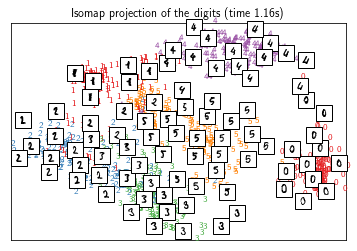

In [8]:
# Isomap projection of the digits dataset
print("Computing Isomap embedding")
t0 = time()
X_iso = manifold.Isomap(n_neighbors, n_components=2).fit_transform(X)
print("Done.")
plot_embedding(X_iso, "Isomap projection of the digits (time %.2fs)" % (time() - t0))

Computing LLE embedding
Done. Reconstruction error: 1.63544e-06


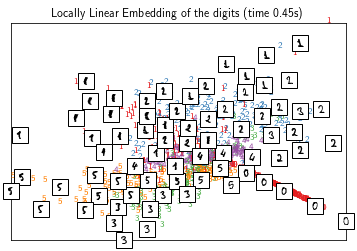

In [9]:
# Locally linear embedding of the digits dataset
print("Computing LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='standard')
t0 = time()
X_lle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_lle, "Locally Linear Embedding of the digits (time %.2fs)" % (time() - t0))

Computing modified LLE embedding
Done. Reconstruction error: 0.360715


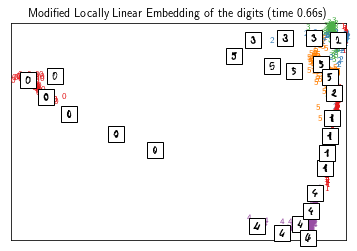

In [10]:
# Modified Locally linear embedding of the digits dataset
print("Computing modified LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='modified')
t0 = time()
X_mlle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_mlle, "Modified Locally Linear Embedding of the digits (time %.2fs)" % (time() - t0))

Computing Hessian LLE embedding
Done. Reconstruction error: 0.212808


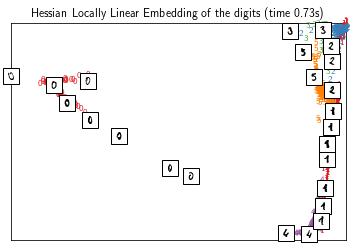

In [11]:
# HLLE embedding of the digits dataset
print("Computing Hessian LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='hessian')
t0 = time()
X_hlle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_hlle, "Hessian Locally Linear Embedding of the digits (time %.2fs)" % (time() - t0))

Computing LTSA embedding
Done. Reconstruction error: 0.212804


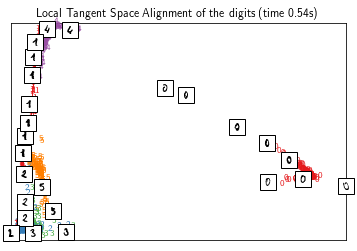

In [12]:
# LTSA embedding of the digits dataset
print("Computing LTSA embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='ltsa')
t0 = time()
X_ltsa = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_ltsa, "Local Tangent Space Alignment of the digits (time %.2fs)" % (time() - t0))

Computing MDS embedding
Done. Stress: 138466282.817293


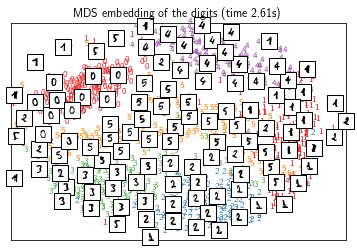

In [13]:
# MDS  embedding of the digits dataset
print("Computing MDS embedding")
clf = manifold.MDS(n_components=2, n_init=1, max_iter=100)
t0 = time()
X_mds = clf.fit_transform(X)
print("Done. Stress: %f" % clf.stress_)
plot_embedding(X_mds, "MDS embedding of the digits (time %.2fs)" % (time() - t0))

Computing Totally Random Trees embedding


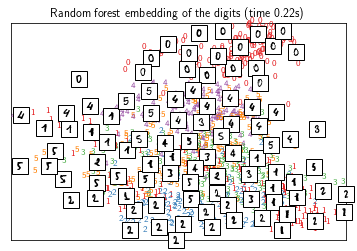

In [14]:
# Random Trees embedding of the digits dataset
print("Computing Totally Random Trees embedding")
hasher = ensemble.RandomTreesEmbedding(n_estimators=200, random_state=0,
                                       max_depth=5)
t0 = time()
X_transformed = hasher.fit_transform(X)
pca = decomposition.TruncatedSVD(n_components=2)
X_reduced = pca.fit_transform(X_transformed)

plot_embedding(X_reduced, "Random forest embedding of the digits (time %.2fs)" % (time() - t0))

Computing Spectral embedding


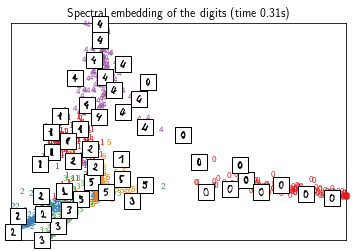

In [15]:
# Spectral embedding of the digits dataset
print("Computing Spectral embedding")
embedder = manifold.SpectralEmbedding(n_components=2, random_state=0,
                                      eigen_solver="arpack")
t0 = time()
X_se = embedder.fit_transform(X)

plot_embedding(X_se, "Spectral embedding of the digits (time %.2fs)" % (time() - t0))

Computing t-SNE embedding


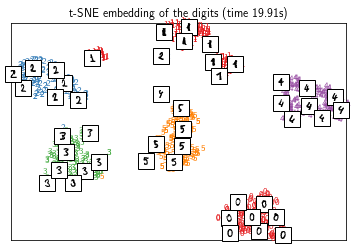

In [16]:
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne, "t-SNE embedding of the digits (time %.2fs)" % (time() - t0))

plt.show()

In [11]:
import hdbscan 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [7]:
%whos ndarray

Variable   Type       Data/Info
-------------------------------
X          ndarray    1083x64: 69312 elems, type `float64`, 554496 bytes (541.5 kb)
img        ndarray    200x200: 40000 elems, type `float64`, 320000 bytes (312.5 kb)
y          ndarray    1083: 1083 elems, type `int64`, 8664 bytes


In [6]:
hdb = hdbscan.HDBSCAN()

Use PCA to create a 2D dataset to visualize teh data

In [12]:
Xpca2 = PCA(n_components=2).fit_transform(StandardScaler().fit_transform(X)) 

In [13]:
Xpca2.shape

(1083, 2)

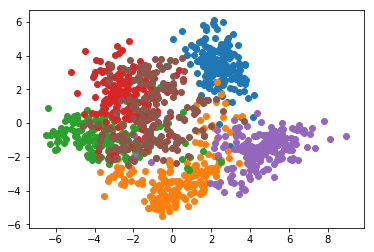

In [29]:
for lb in np.unique(y):
    idx, = np.where(y == lb)
    plt.scatter(*Xpca2[idx, :].T)

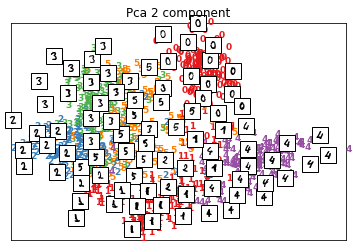

In [30]:
plot_embedding(Xpca2, "Pca 2 component")

In [34]:
hdb_pca2 = hdb.fit_predict(X)

In [35]:
hdb.labels_

array([2, 8, 3, ..., 6, 6, 2])

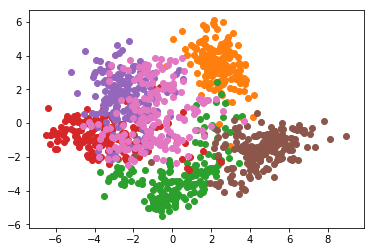

In [47]:
for lb in np.unique(hdb_pca2):
    idx, = np.where(y == lb)
    if lb == -1:
        plt.scatter(*Xpca2[idx, :].T, color='k')
    plt.scatter(*Xpca2[idx, :].T)

In [41]:
np.unique(hdb_pca2, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8]),
 array([100,  27, 170, 177,   6, 168, 148, 159,  47,  81]))

In [43]:
for lb, cnt in zip(*np.unique(hdb_pca2, return_counts=True)):
    print(f"{lb}:\t{cnt}")

-1:	100
0:	27
1:	170
2:	177
3:	6
4:	168
5:	148
6:	159
7:	47
8:	81
